<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Load Data</a></span></li></ul></li><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Train test split</a></span></li><li><span><a href="#Classification-modeling" data-toc-modified-id="Classification-modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classification modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Ridge-Classifier" data-toc-modified-id="Ridge-Classifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ridge Classifier</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#GNB" data-toc-modified-id="GNB-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>GNB</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>KNN</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
%matplotlib inline
sns.set(style = "whitegrid")
sns.set_palette("icefire")
plt.rcParams['figure.figsize'] = (9, 6)
pd.set_option('display.max_columns', 500)
warnings.filterwarnings(action="ignore")

In [106]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter

## Load Data

In [54]:
providers = joblib.load('Providers_Final_Second.pkl')
providers = providers.set_index('Provider')
print(providers.shape)
providers.head()

(5410, 118)


,PotentialFraud,Perc_Outpatient,DualPatientProvider,Perc_DualPatientType,Ratio_ClaimsPerAttPhys,Ratio_ClaimsPerPatient,PatientsPerAttPhys,PatientsPerOperPhys,PatientsPerOthPhys,Perc_MultHospAttPhys,Perc_MultHospOperPhys,Perc_MultHospOtherPhys,Perc_HasTop5AdmitCode,Perc_ClaimsPerTopFraudState,Mean_StatePerAttPhys,Mean_StatePerOperPhys,Mean_StatePerOthPhys,IP_Count_UniquePatients,IP_Perc_MultHosp,IP_Perc_Duplicates,IP_Mean_Duplicate_per_AttPhy,IP_Mean_Duplicate_per_Patient,IP_Perc_Dup_Diff_Provider,IP_Perc_Dup_Diff_State,IP_Count_UniqueState,IP_Mean_PatientsPerAttPhys,IP_Mean_PatientsPerOperPhys,IP_Mean_PatientsPerOtherPhys,IP_Perc_HasAttPhys,IP_Perc_HasNoPhys,IP_Perc_AttPhysIsOperPhys,IP_Mean_ClaimCost,IP_Mean_DailyClaimCost,IP_Mean_ClaimCostPerAttPhys,IP_Mean_ClaimCostPerOperPhys,IP_Mean_ClaimCostPerOtherPhys,IP_Mean_ClaimCostPerPatient,IP_Perc_No_ProcCode,IP_Sum_DeductibleAmtPaid,IP_Mean_AnnualDeductibleAmt,IP_Sum_InscClaimAmtReimbursed,IP_Mean_InsReimbursementRatio,IP_Mean_AnnualReimbursementAmt,IP_Mean_NoOfMonths_PartACov,IP_Mean_NoOfMonths_PartBCov,IP_Mean_ClaimDuration,IP_Mean_AdmitDuration,IP_Mean_AdmitDurationPerAttPhys,IP_Mean_AdmitDurationPerPatient,IP_Mean_AgeAtClaim,IP_AgeRange,IP_Perc_HasDied,IP_Perc_GenderZero,IP_Perc_RaceOne,IP_Perc_RaceThree,IP_Perc_RaceTwo,IP_Perc_HasRenalDisease,IP_Mean_NumChronicConds,IP_Perc_Alzheimers_Chronic,IP_Perc_Cancer_Chronic,IP_Perc_Depression_Chronic,IP_Perc_Diabetes_Chronic,IP_Perc_HeartFailure_Chronic,IP_Perc_IschemicHeart_Chronic,IP_Perc_KidneyDisease_Chronic,IP_Perc_ObstrPulmonary_Chronic,IP_Perc_Osteoporosis_Chronic,IP_Perc_RheumatoidArthritis_Chronic,IP_Perc_Stroke_Chronic,OP_Count_UniquePatients,OP_Perc_MultHosp,OP_Perc_Duplicates,OP_Mean_Duplicate_per_AttPhy,OP_Mean_Duplicate_per_Patient,OP_Perc_Dup_Diff_Provider,OP_Perc_Dup_Diff_State,OP_Count_UniqueState,OP_Mean_PatientsPerAttPhys,OP_Mean_PatientsPerOperPhys,OP_Mean_PatientsPerOtherPhys,OP_Perc_HasNoPhys,OP_Perc_AttPhysIsOperPhys,OP_Perc_HasAttPhys,OP_Mean_ClaimCost,OP_Mean_DailyClaimCost,OP_Mean_ClaimCostPerAttPhys,OP_Mean_ClaimCostPerOperPhys,OP_Mean_ClaimCostPerOtherPhys,OP_Mean_ClaimCostPerPatient,OP_Perc_No_DiagCode,OP_Sum_DeductibleAmtPaid,OP_Mean_AnnualDeductibleAmt,OP_Sum_InscClaimAmtReimbursed,OP_Mean_InsReimbursementRatio,OP_Mean_AnnualReimbursementAmt,OP_Mean_NoOfMonths_PartACov,OP_Mean_NoOfMonths_PartBCov,OP_Mean_ClaimDuration,OP_Mean_AgeAtClaim,OP_AgeRange,OP_Perc_HasDied,OP_Perc_GenderZero,OP_Perc_RaceOne,OP_Perc_RaceThree,OP_Perc_RaceTwo,OP_Perc_HasRenalDisease,OP_Mean_NumChronicConds,OP_Perc_Alzheimers_Chronic,OP_Perc_Cancer_Chronic,OP_Perc_Depression_Chronic,OP_Perc_Diabetes_Chronic,OP_Perc_HeartFailure_Chronic,OP_Perc_IschemicHeart_Chronic,OP_Perc_KidneyDisease_Chronic,OP_Perc_ObstrPulmonary_Chronic,OP_Perc_Osteoporosis_Chronic,OP_Perc_RheumatoidArthritis_Chronic,OP_Perc_Stroke_Chronic
Provider,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PRV51001,0,0.800000,1,0.400000,1.785714,1.041667,10,19,16,0.240000,0.040000,0.000000,0.040000,0.0,1.000000,1.000000,1.000000,5.0,0.160000,0.000000,0.0,0.0,0.000000,0.000000,1.0,1.25,1.0,1.0,1.0,0.0,0.000000,20468.000000,4077.360000,19693.000000,24068.000000,43068.0,20468.000000,0.600000,5340.0,897.120000,97000.0,0.878279,17606.000000,12.000000,12.000000,6.000000,6.000000,20468.000000,20468.000000,77.600000,26.0,0.000000,0.400000,1.000000,0.0,0.000000,0.400000,6.000000,0.400000,0.200000,0.800000,0.800000,0.800000,0.800000,0.800000,0.400000,0.000000,0.600000,0.400000,19.0,0.920000,0.550000,1.833333,1.000000,0.550000,0.437500,1.0,2.000000,1.000000,1.285714,0.000000,0.000000,1.000000,382.000000,307.000000,322.950000,333.333333,217.857143,373.421053,0.000000,0.0,463.920000,7640.0,1.000000,2615.200000,12.000000,12.000000,1.550000,77.950000,40.0,0.000000,0.350000,0.800000,0.000000,0.200000,0.300000,5.450000,0.650000,0.200000,0.250000,0.850000,0.750000,0.950000,0.650000,0.400000,0.300000,0.250000,0.200000
P

In [58]:
providers.columns.tolist()

['PotentialFraud',
 'Perc_Outpatient',
 'DualPatientProvider',
 'Perc_DualPatientType',
 'Ratio_ClaimsPerAttPhys',
 'Ratio_ClaimsPerPatient',
 'PatientsPerAttPhys',
 'PatientsPerOperPhys',
 'PatientsPerOthPhys',
 'Perc_MultHospAttPhys',
 'Perc_MultHospOperPhys',
 'Perc_MultHospOtherPhys',
 'Perc_HasTop5AdmitCode',
 'Perc_ClaimsPerTopFraudState',
 'Mean_StatePerAttPhys',
 'Mean_StatePerOperPhys',
 'Mean_StatePerOthPhys',
 'IP_Count_UniquePatients',
 'IP_Perc_MultHosp',
 'IP_Perc_Duplicates',
 'IP_Mean_Duplicate_per_AttPhy',
 'IP_Mean_Duplicate_per_Patient',
 'IP_Perc_Dup_Diff_Provider',
 'IP_Perc_Dup_Diff_State',
 'IP_Count_UniqueState',
 'IP_Mean_PatientsPerAttPhys',
 'IP_Mean_PatientsPerOperPhys',
 'IP_Mean_PatientsPerOtherPhys',
 'IP_Perc_HasAttPhys',
 'IP_Perc_HasNoPhys',
 'IP_Perc_AttPhysIsOperPhys',
 'IP_Mean_ClaimCost',
 'IP_Mean_DailyClaimCost',
 'IP_Mean_ClaimCostPerAttPhys',
 'IP_Mean_ClaimCostPerOperPhys',
 'IP_Mean_ClaimCostPerOtherPhys',
 'IP_Mean_ClaimCostPerPatient',
 'IP

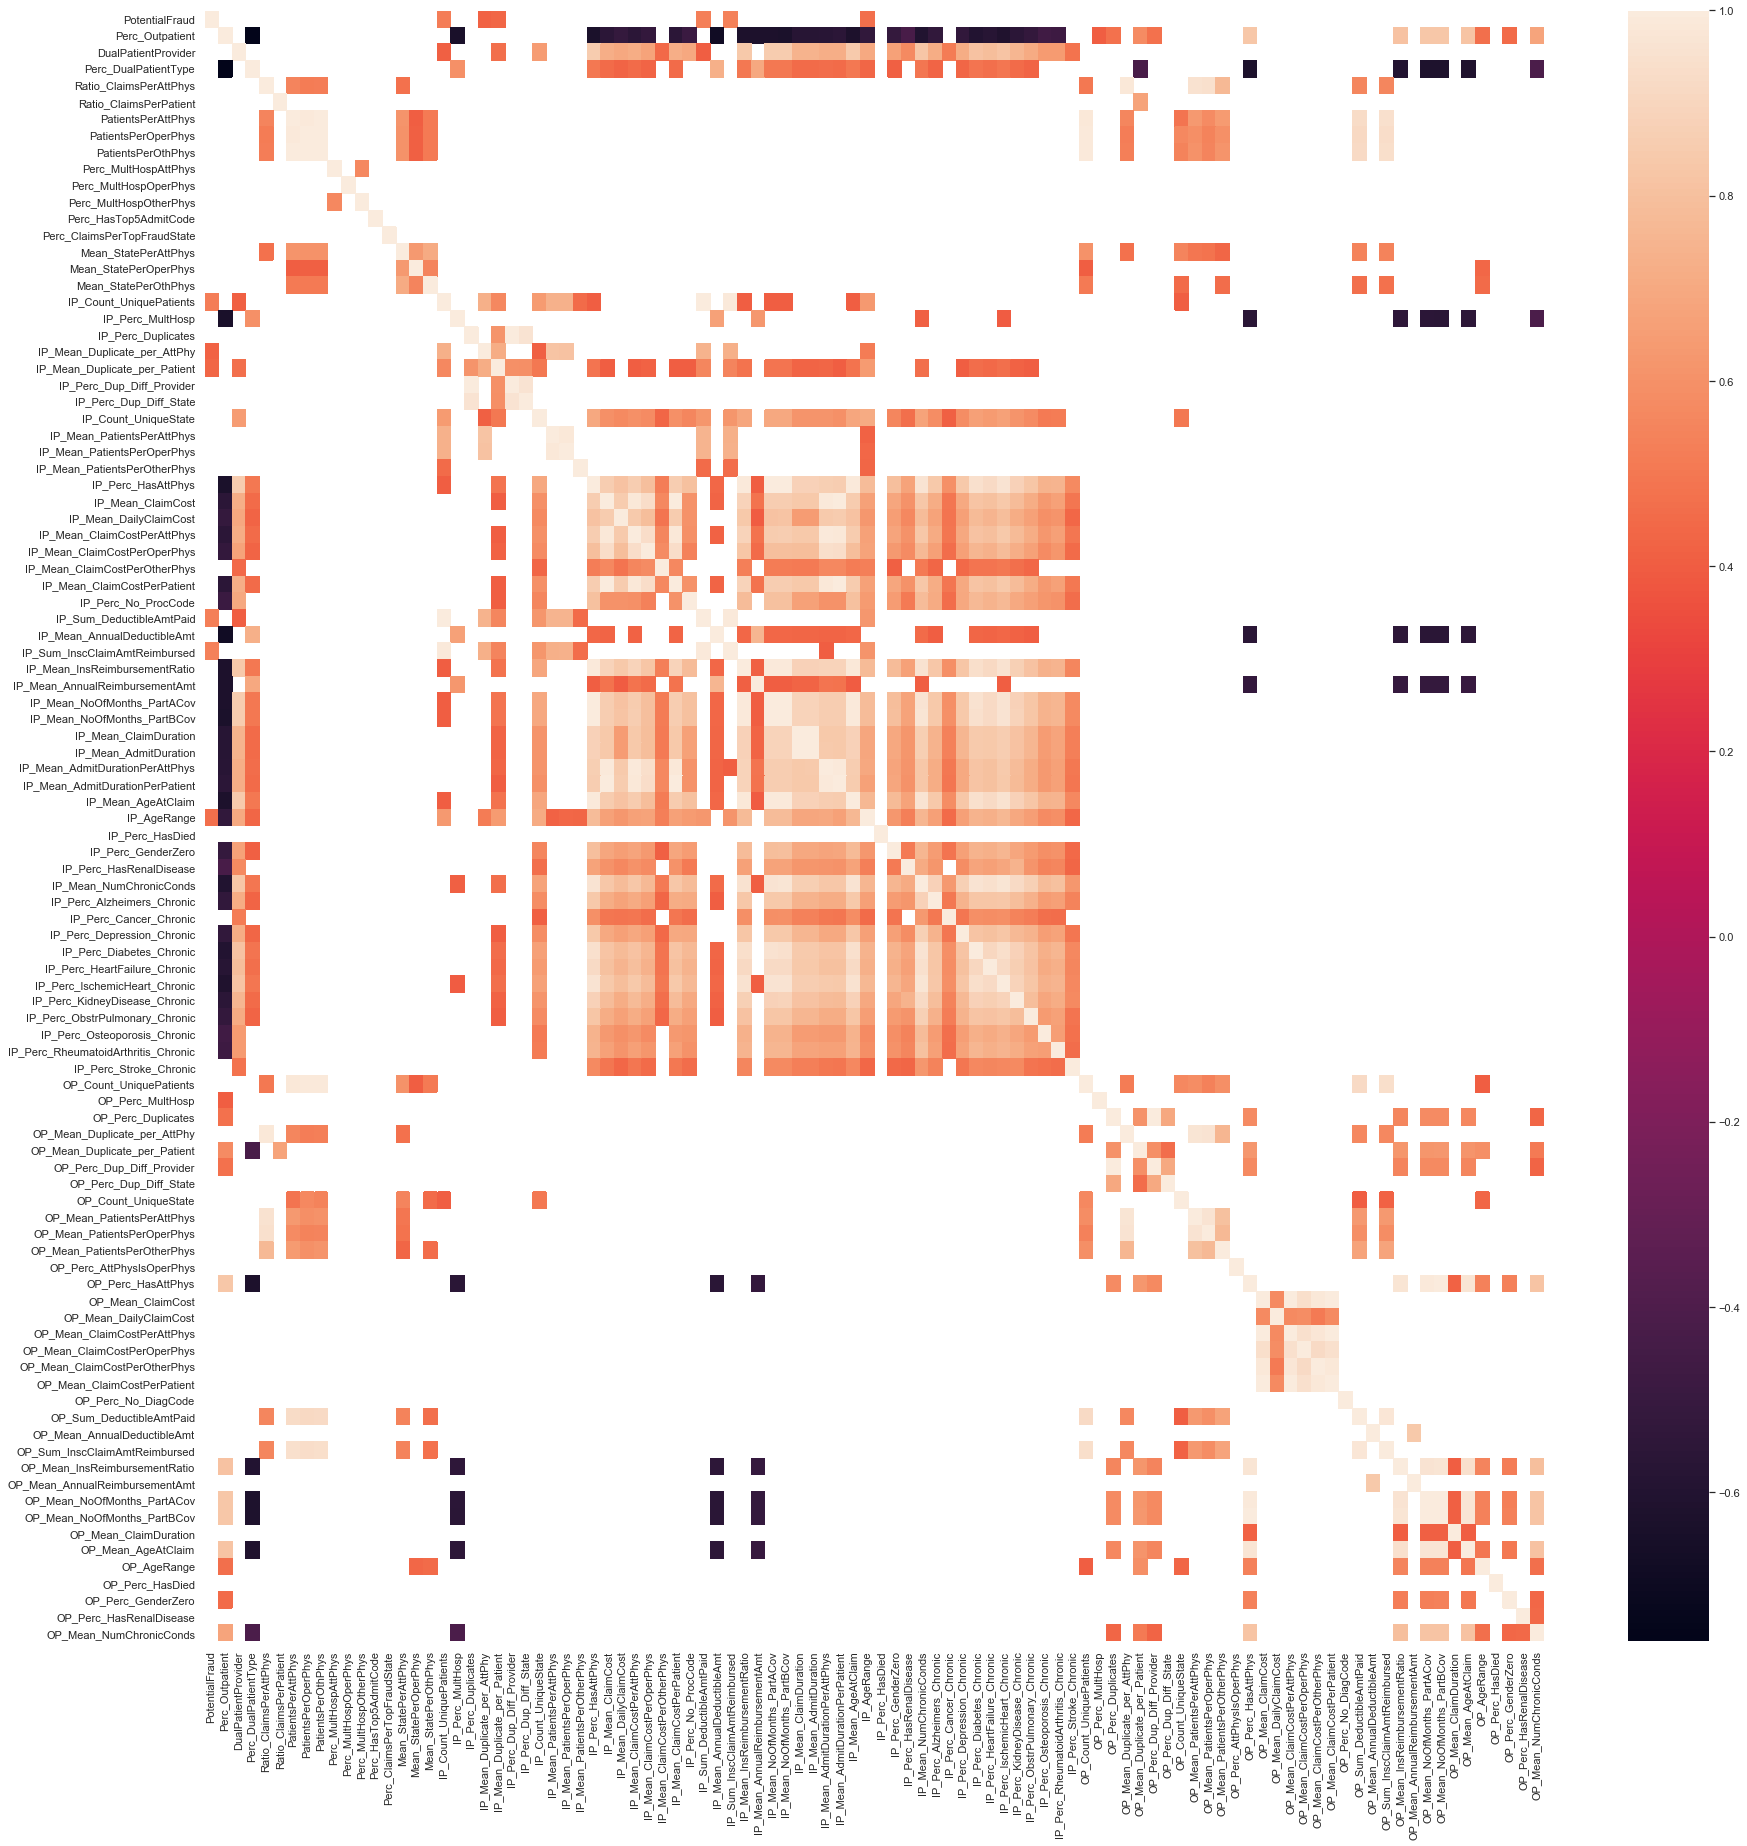

In [104]:
corr = providers.corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr[(corr > 0.4) | (corr < -0.4)]);

In [69]:
# Features to drop
providers.drop(['IP_Perc_RaceOne',
'IP_Perc_RaceThree',
'IP_Perc_RaceTwo',
'OP_Perc_RaceOne',
'OP_Perc_RaceThree',
'OP_Perc_RaceTwo',
'OP_Perc_Alzheimers_Chronic',
'OP_Perc_Cancer_Chronic',
'OP_Perc_Depression_Chronic',
'OP_Perc_Diabetes_Chronic',
'OP_Perc_HeartFailure_Chronic',
'OP_Perc_IschemicHeart_Chronic',
'OP_Perc_KidneyDisease_Chronic',
'OP_Perc_ObstrPulmonary_Chronic',
'OP_Perc_Osteoporosis_Chronic',
'OP_Perc_RheumatoidArthritis_Chronic',
'OP_Perc_Stroke_Chronic',
'OP_Perc_HasNoPhys',
'IP_Perc_HasNoPhys',
'IP_Perc_AttPhysIsOperPhys',
'OP_Mean_AgeAtClaim',
'IP_Mean_AgeAtClaim'],1, inplace = True)



# Train test split

In [70]:
# Separate input features (X) and target variable (y)
y = providers['PotentialFraud']
X = providers.drop('PotentialFraud', axis=1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

# Classification modeling

In [6]:
# Stratified Cross Validation needs to be applied
skf = StratifiedKFold(n_splits = 10, random_state = 0, shuffle = True)

In [88]:
# Model evaluation metric: Recall score
def eval_model(model, best_model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    print(model,'score')
    print('-'*30)
    print('Train: recall score:', round(recall_score(y_train, best_model.predict(X_train)),5))
    print('Test: recall score:', round(recall_score(y_test, best_model.predict(X_test)),5))
    print(' ')
    print("Train Test Confusion Matrix")
    print('-'*30)
    print('Train Set')
    print(confusion_matrix(y_train, best_model.predict(X_train)))
    print('Test Set')
    print(confusion_matrix(y_test, best_model.predict(X_test)))

## Logistic Regression

In [96]:
logistic = LogisticRegression(solver="liblinear", penalty = 'l1', class_weight = 'balanced')

In [97]:
# apply standardization
scaler = MinMaxScaler()
X_train_stan = scaler.fit_transform(X_train)
X_test_stan = scaler.transform(X_test)

In [98]:
param_grid = [{'C': np.logspace(-3,1,50)}]
logisticcv = GridSearchCV(logistic, param_grid, scoring = 'recall', cv = skf)
para_search = logisticcv.fit(X_train_stan, y_train)
best_logistic = para_search.best_estimator_
print('Best estimator:', best_logistic)

Best estimator: LogisticRegression(C=0.19306977288832497, class_weight='balanced', penalty='l1',
                   solver='liblinear')


In [99]:
eval_model('Logistic Regression', best_logistic, X_train_stan, X_test_stan, y_train, y_test)

Logistic Regression score
------------------------------
Train: recall score: 0.89266
Test: recall score: 0.89474
 
Train Test Confusion Matrix
------------------------------
Train Set
[[2859  574]
 [  38  316]]
Test Set
[[1246  225]
 [  16  136]]


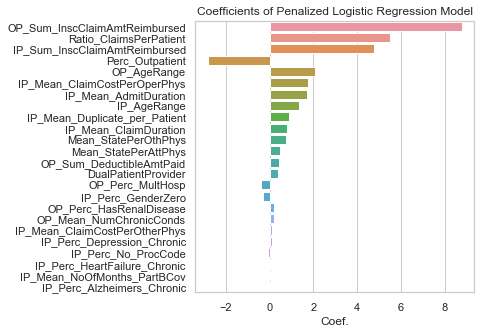

In [100]:
logistic_coef = pd.DataFrame(best_logistic.coef_.T, index = X.columns).rename(columns = {0:"Coef."})
logistic_coef = logistic_coef.reindex(logistic_coef["Coef."].abs().sort_values(ascending = False).index)
logistic_coef = logistic_coef.reset_index()
plt.figure(figsize = (5,5))
sns.barplot(data = logistic_coef[logistic_coef['Coef.'].abs() > 0], x = 'Coef.', y = 'index');
plt.title('Coefficients of Penalized Logistic Regression Model');
plt.ylabel('');

## Ridge Classifier

In [116]:
reduced_features = logistic_coef[logistic_coef['Coef.'].abs() > 0]['index'].tolist()

In [125]:
ridge_df = providers.iloc[:,providers.columns.isin(reduced_features)]
ridge_df = ridge_df.merge(y, on = 'Provider')

In [126]:
y = ridge_df['PotentialFraud']
X = ridge_df.drop('PotentialFraud', axis=1)

In [127]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, 
                                                    stratify = y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [131]:
ridge = RidgeClassifier(normalize = True, class_weight = 'balanced', random_state = 0)

In [133]:
param_grid = [{'alpha': np.logspace(-3,1,50)}]
ridgecv = GridSearchCV(ridge, param_grid, scoring = 'recall', cv = skf)
para_search = ridgecv.fit(X_train_r, y_train_r)
best_ridge = para_search.best_estimator_
print('Best estimator:', best_ridge)

Best estimator: RidgeClassifier(alpha=3.2374575428176433, class_weight='balanced',
                normalize=True, random_state=0)


In [134]:
eval_model('Ridge Classifier', best_ridge, X_train_r, X_test_r, y_train_r, y_test_r)

Ridge Classifier score
------------------------------
Train: recall score: 0.90113
Test: recall score: 0.88158
 
Train Test Confusion Matrix
------------------------------
Train Set
[[2648  785]
 [  35  319]]
Test Set
[[1161  310]
 [  18  134]]


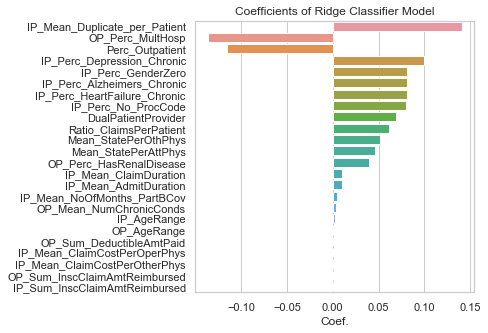

In [135]:
ridge_coef = pd.DataFrame(best_ridge.coef_.T, index = X.columns).rename(columns = {0:"Coef."})
ridge_coef = ridge_coef.reindex(ridge_coef["Coef."].abs().sort_values(ascending = False).index)
ridge_coef = ridge_coef.reset_index()
plt.figure(figsize = (5,5))
sns.barplot(data = ridge_coef, x = 'Coef.', y = 'index');
plt.title('Coefficients of Ridge Classifier Model');
plt.ylabel('');

## Random Forest

In [72]:
randomForest = RandomForestClassifier(random_state = 0, max_features = 'auto', class_weight = 'balanced_subsample')
grid_para_forest = {'n_estimators': [100,500,1000,2500,5000],
                    'max_depth': [3,5,7,8,10],
                    'min_samples_split': [2,4,8,12],
                    'min_samples_leaf' : [2,4,8,12]}

In [73]:
grid_search_forest = RandomizedSearchCV(randomForest,
                                        grid_para_forest,
                                        cv=skf, 
                                        n_jobs = 5, 
                                        verbose = 1,
                                        return_train_score = True,
                                        scoring = 'recall')
# Fit Random Forest 
para_search = grid_search_forest.fit(X_train, y_train)

# Save the best estimator
best_rf = para_search.best_estimator_
print('Best parameters:', para_search.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:  2.9min finished


Best parameters: {'n_estimators': 2500, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 3}


In [89]:
eval_model('Random Forest', best_rf, X_train, X_test, y_train, y_test)

Random Forest score
------------------------------
Train: recall score: 0.91808
Test: recall score: 0.90132
 
Train Test Confusion Matrix
------------------------------
Train Set
[[2918  515]
 [  29  325]]
Test Set
[[1263  208]
 [  15  137]]


In [77]:
grid_search_forest.cv_results_['mean_train_score']

array([0.91556554, 0.95417579, 0.98242641, 0.93439798, 0.94727036,
       0.98681907, 0.95323239, 0.97991562, 0.93660022, 0.95731354])

In [78]:
grid_search_forest.cv_results_['mean_test_score']

array([0.86166667, 0.75380952, 0.64928571, 0.81611111, 0.76801587,
       0.63809524, 0.75095238, 0.69730159, 0.81055556, 0.75380952])

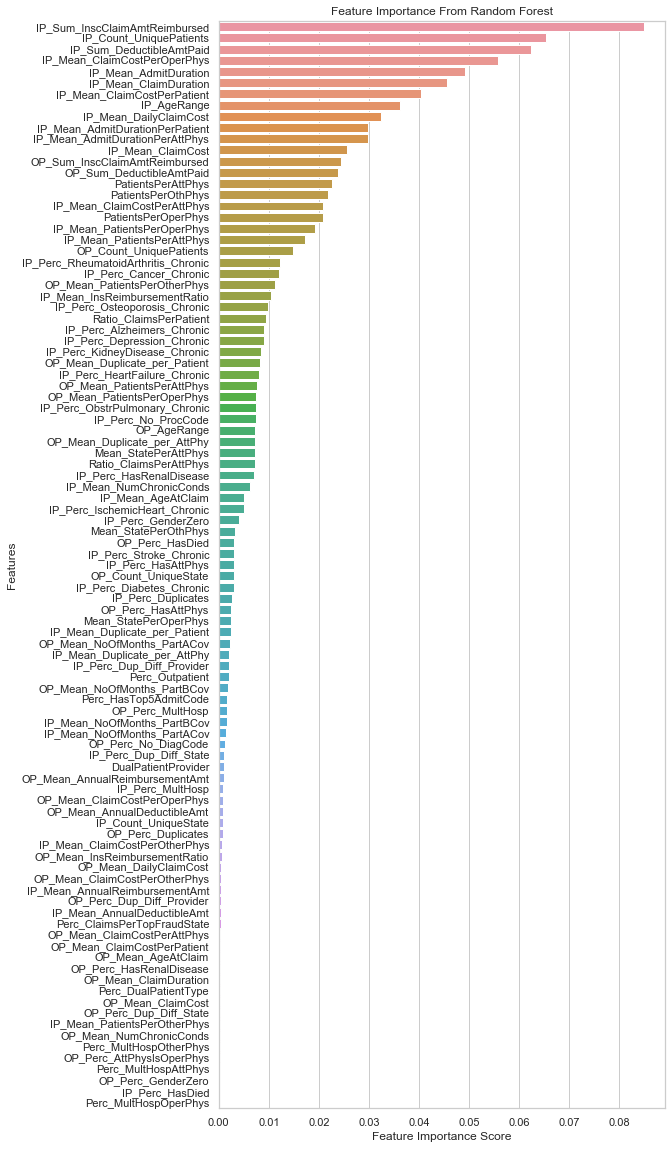

In [79]:
sorted_importance = sorted(zip(X_train.columns, best_rf.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (8,20))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
sns.barplot(data = df, x = 'importance_score', y= 'feature_name', orient = 'h');
plt.title('Feature Importance From Random Forest');
plt.xlabel('Feature Importance Score');
plt.ylabel('Features');

## SVM

In [80]:
svm = SVC(random_state = 0, class_weight = 'balanced')
grid_para_svm = {'C':np.logspace(-3,2,100)}

In [81]:
grid_search_svm = RandomizedSearchCV(svm, 
                                    grid_para_svm, 
                                    cv= skf, 
                                    n_jobs = 5, 
                                    verbose = 1,
                                    return_train_score = True,
                                    scoring = 'recall')
para_search = grid_search_svm.fit(X_train_stan, y_train)
best_svm = para_search.best_estimator_
print('Best parameters:', para_search.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   12.3s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   37.9s finished


Best parameters: {'C': 0.052140082879996844}


In [90]:
eval_model('SVM', best_svm, X_train_stan, X_test_stan, y_train, y_test)

SVM score
------------------------------
Train: recall score: 0.90678
Test: recall score: 0.89474
 
Train Test Confusion Matrix
------------------------------
Train Set
[[2269 1164]
 [  33  321]]
Test Set
[[1009  462]
 [  16  136]]


## GNB

In [91]:
gnb = GaussianNB()

In [92]:
gnb.fit(X_train,y_train)

GaussianNB()

In [105]:
eval_model('GNB', gnb, X_train, X_test, y_train, y_test)

GNB score
------------------------------
Train: recall score: 0.48023
Test: recall score: 0.48684
 
Train Test Confusion Matrix
------------------------------
Train Set
[[3288  145]
 [ 184  170]]
Test Set
[[1420   51]
 [  78   74]]


## KNN

In [33]:
knn = KNeighborsClassifier()
grid_para_knn = {'n_neighbors': [10,70,100,200,300,400,500,1000,2000]}

In [34]:
grid_search_knn = RandomizedSearchCV(knn, 
                                    grid_para_knn, 
                                    cv= skf, 
                                    n_jobs = 3, 
                                    verbose = 1,
                                    return_train_score = True,
                                    scoring = 'recall')
para_search = grid_search_knn.fit(X_train_stan, y_train)
best_knn = para_search.best_estimator_
print('Best parameters:', para_search.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   21.4s


Best parameters: {'n_neighbors': 10}


[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed:   54.9s finished


In [35]:
recall_score(y_train, best_knn.predict(X_train_stan))

0.3644067796610169

In [36]:
recall_score(y_test, best_knn.predict(X_test_stan))

0.34868421052631576

In [37]:
confusion_matrix(y_train, best_knn.predict(X_train_stan))

array([[3395,   38],
       [ 225,  129]])

In [38]:
confusion_matrix(y_test, best_knn.predict(X_test_stan))

array([[1447,   24],
       [  99,   53]])